# Analysis

## Data Exploration

In [3]:
# load dataset from csv file
# load python modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
#import seaborn as sns
%matplotlib inline

def load_data(file_name):

    # Load the wholesale dataset
    dataset_file = file_name
    try:
        data = pd.read_csv(dataset_file, delimiter=",")

        # temporary drop column 'status' due to type string
        status_cl = pd.DataFrame(data['STATUS'], columns = ['STATUS'], dtype=np.str).reset_index(drop=True)
        data = data.drop(['STATUS'], 1)

        # apply rest of columns converting to float type
        data = data.apply(pd.to_numeric, args=('coerce',)).reset_index(drop=True)


        data = pd.concat([data, status_cl], axis=1)
        data = data.reset_index(drop=True)
        print data.dtypes
        print "Wholesale flight dataset has {} samples with {} features each.".format(*data.shape)
    except:
        print "Dataset could not be loaded!"
    return data
print "Loading training data..."
learn_data = load_data(r'raw_data.csv').reset_index(drop=True)
print "\nLoading testing data..."
test_data = load_data(r'test_data.csv').reset_index(drop=True)
all_data = pd.concat([learn_data, test_data], axis=0).reset_index(drop=True)
print all_data.columns

Loading training data...
BAR            float64
MOTOR1           int64
MOTOR2           int64
MOTOR3           int64
MOTOR4           int64
LIDAR          float64
THRUST         float64
ACC_X          float64
ACC_Y          float64
ACC_Z          float64
MAG_Z          float64
GYRO_X         float64
GYRO_Y         float64
GYRO_Z         float64
PITCH          float64
ROLL           float64
YAW            float64
TIME             int64
LOG_ID           int64
LAND_STATUS      int64
STATUS          object
dtype: object
Wholesale flight dataset has 41147 samples with 21 features each.

Loading testing data...
BAR            float64
MOTOR1           int64
MOTOR2           int64
MOTOR3           int64
MOTOR4           int64
LIDAR          float64
THRUST         float64
ACC_X          float64
ACC_Y          float64
ACC_Z          float64
MAG_Z          float64
GYRO_X         float64
GYRO_Y         float64
GYRO_Z         float64
PITCH          float64
ROLL           float64
YAW            floa

In [22]:
# samples of dataset
from IPython.display import display # Allows the use of display() for DataFrames
indices = [1,100, 200, 1073,9999, 32050]
samples = pd.DataFrame(np.round(all_data.loc[indices], 3), columns = all_data.keys()[0:10])
display(samples)
samples = pd.DataFrame(np.round(all_data.loc[indices], 3), columns = all_data.keys()[10:])
display(samples)

,BAR,MOTOR1,MOTOR2,MOTOR3,MOTOR4,LIDAR,THRUST,ACC_X,ACC_Y,ACC_Z
1,1019.44,1298,1298,1298,1298,0.047,0.000,-0.906,0.055,-9.837
100,1019.29,1517,1624,1507,1531,0.298,0.686,-0.116,-0.083,-13.008
200,1018.91,1437,1486,1445,1466,3.263,0.521,0.334,-0.291,-9.822
1073,1019.23,1425,1515,1396,1481,0.495,0.512,-0.498,-0.075,-10.002
9999,1019.35,1513,1616,1509,1572,0.177,0.622,-0.233,-0.001,-12.335
32050,1012.42,1535,1525,1461,1462,3.150,0.546,0.091,0.199,-8.652


,MAG_Z,GYRO_X,GYRO_Y,GYRO_Z,PITCH,ROLL,YAW,TIME,LOG_ID,LAND_STATUS,STATUS
1,0.489,0.015,0.027,-0.003,-0.081,0.016,2.633,64927667,0,0,take_off
100,0.457,-0.221,0.003,-0.055,0.083,-0.015,2.614,66566750,0,0,take_off
200,0.483,-0.008,0.057,-0.003,0.001,0.033,2.628,68336653,0,0,take_off
1073,0.474,0.039,0.024,-0.035,-0.056,0.021,-1.934,84077889,0,1,land
9999,0.463,-0.156,-0.133,-0.032,0.090,-0.011,3.000,42166481,5,0,take_off
32050,0.498,0.016,0.054,-0.022,0.002,-0.031,-1.020,550829712,10,0,flight


In [23]:
display(all_data[all_data.keys()[0:11]].describe().round(3))

,BAR,MOTOR1,MOTOR2,MOTOR3,MOTOR4,LIDAR,THRUST,ACC_X,ACC_Y,ACC_Z,MAG_Z
count,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000
mean,1014.537,1466.298,1510.502,1441.252,1476.070,5.890,0.537,-0.064,-0.064,-9.802,0.482
std,2.757,97.355,100.373,99.777,99.054,8.340,0.105,0.659,0.528,1.357,0.021
min,1009.240,910.000,910.000,910.000,910.000,0.000,0.000,-20.925,-7.646,-47.693,-0.519
25%,1012.170,1434.000,1480.000,1406.000,1445.000,0.059,0.509,-0.378,-0.361,-10.153,0.472
50%,1013.980,1477.000,1517.000,1450.000,1483.000,4.887,0.546,-0.057,-0.097,-9.775,0.484
75%,1017.410,1514.000,1559.000,1492.000,1526.000,7.956,0.585,0.235,0.191,-9.383,0.494
max,1019.680,1879.000,1879.000,1819.000,1878.000,65.324,1.000,16.850,15.148,9.816,0.561


In [4]:
display(all_data[all_data.keys()[11:]].describe().round(3))

,GYRO_X,GYRO_Y,GYRO_Z,PITCH,ROLL,YAW,TIME,LOG_ID,LAND_STATUS
count,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000,8.808400e+04,88084.000,88084.000
mean,-0.002,0.000,-0.006,-0.012,0.007,-0.212,2.253052e+08,13.414,0.013
std,0.151,0.230,0.207,0.095,0.066,2.124,2.585364e+08,6.671,0.115
min,-4.609,-4.209,-2.315,-1.424,-1.412,-3.141,3.682341e+07,0.000,0.000
25%,-0.054,-0.058,-0.034,-0.048,-0.019,-2.549,7.800245e+07,8.000,0.000
50%,-0.001,0.001,0.000,-0.008,0.010,-0.136,1.295035e+08,15.000,0.000
75%,0.048,0.058,0.034,0.028,0.040,1.643,2.569603e+08,18.000,0.000
max,2.270,5.734,1.986,0.772,3.120,3.142,1.633813e+09,24.000,1.000


## Data visualization

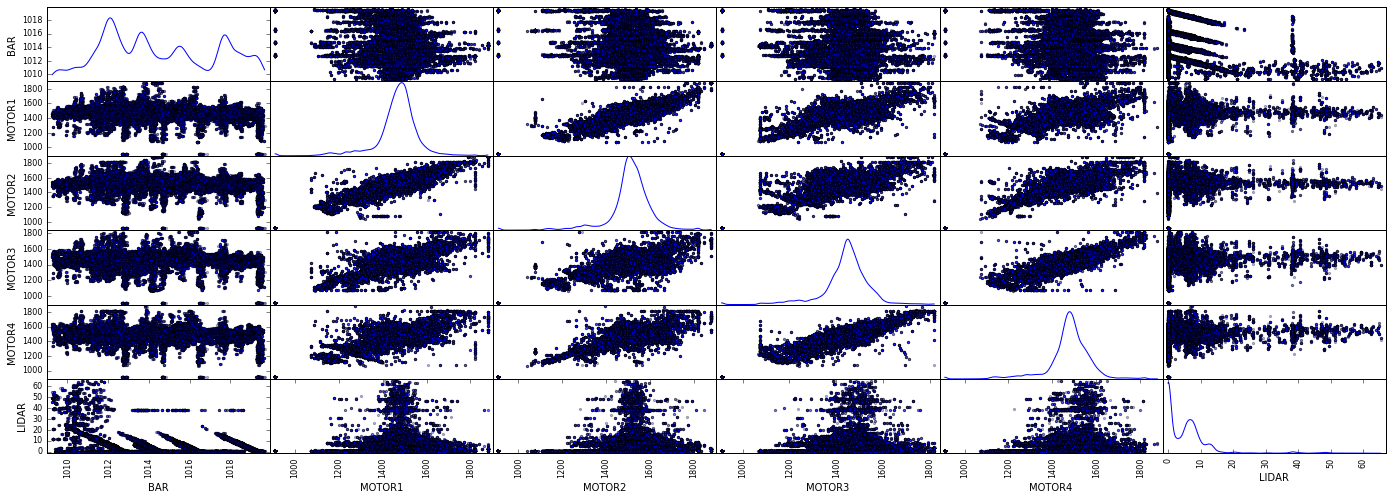

In [9]:
pd.scatter_matrix(all_data[all_data.keys()[0:6]], alpha = 0.3, figsize = (24,8), diagonal = 'kde');

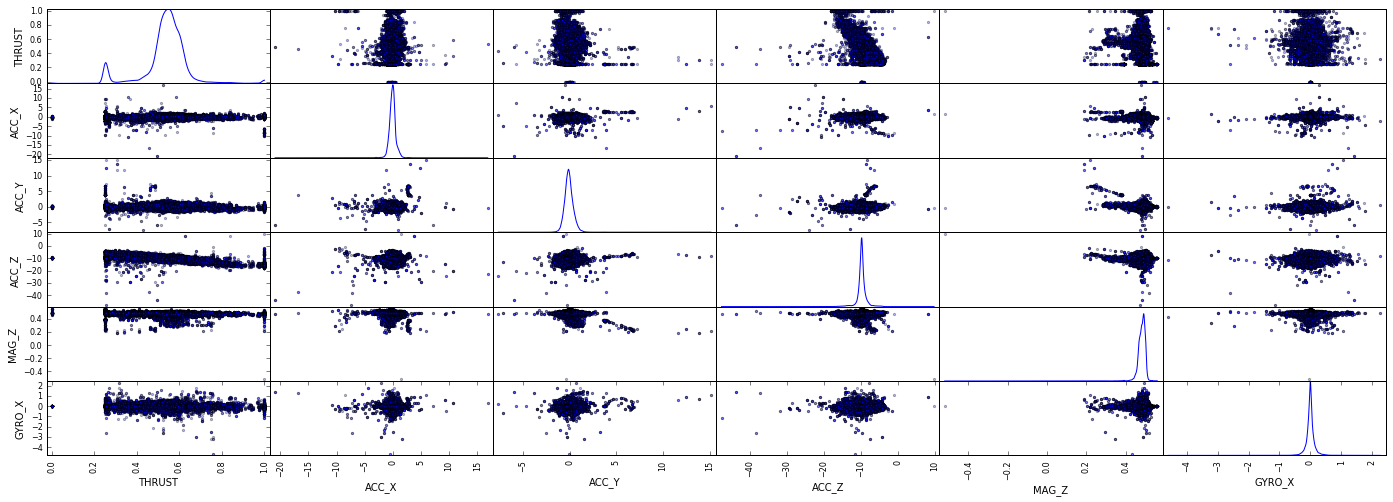

In [10]:
pd.scatter_matrix(all_data[all_data.keys()[6:12]], alpha = 0.3, figsize = (24,8), diagonal = 'kde');

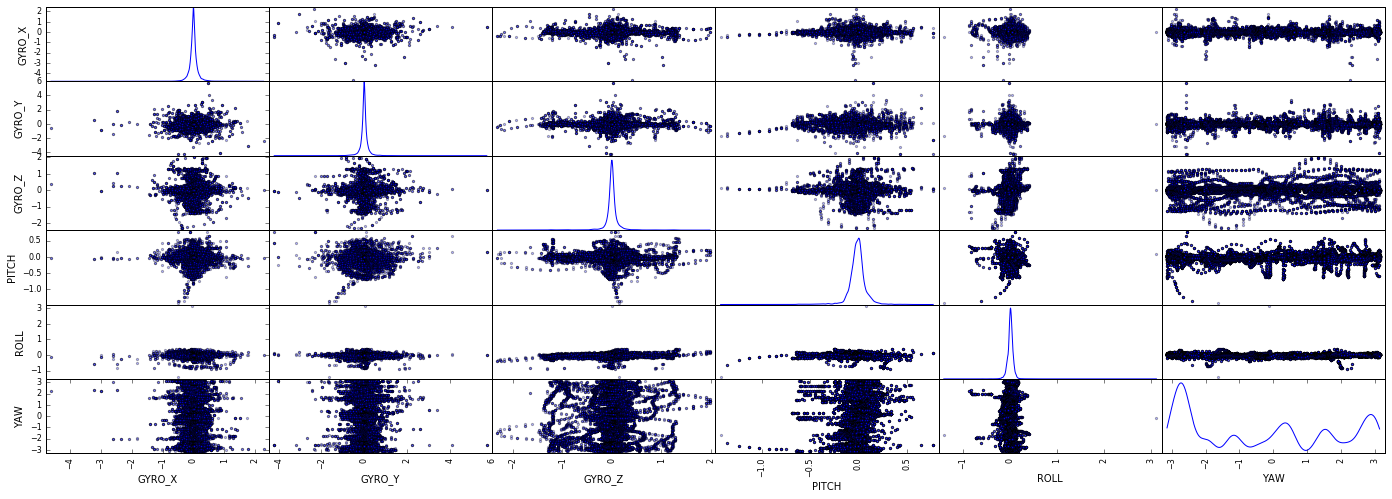

In [12]:
pd.scatter_matrix(all_data[all_data.keys()[11:-4]], alpha = 0.3, figsize = (24,8), diagonal = 'kde');

## Particular log id data visual exploration

In [34]:
def show_data_from_logid(log_id, features, time_interval=1.0):
    logid_data = all_data[all_data['LOG_ID'] == log_id]
    
    # process values shifting if necessary
    tmp_features = []
    for item in features:
        if type(item) is tuple:
            feature_name = item[0]
            if len(item) == 3:
                rate = item[2] # scale value
                logid_data[feature_name] = logid_data[feature_name] * rate
            value_shift = item[1] # shift value
            logid_data[feature_name] = logid_data[feature_name] + value_shift                
            tmp_features.append(feature_name)
        else:
            tmp_features.append(item)
    features = tmp_features
        
    # scale time to seconds
    logid_data['TIME'] = logid_data['TIME'] / (0.5e+6)
    
    # prepare x sticks
    x_stick = np.arange(logid_data['TIME'].min(), logid_data['TIME'].max(), time_interval)
    x_stick = pd.DataFrame(x_stick, columns = ['Time'])
    
    # plot data
    fig, ax = plt.subplots(figsize = (14,8))
    logid_data.plot(x = 'TIME', y = features, 
                  xticks=x_stick['Time'], kind = 'line', ax=ax, rot=70);

C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

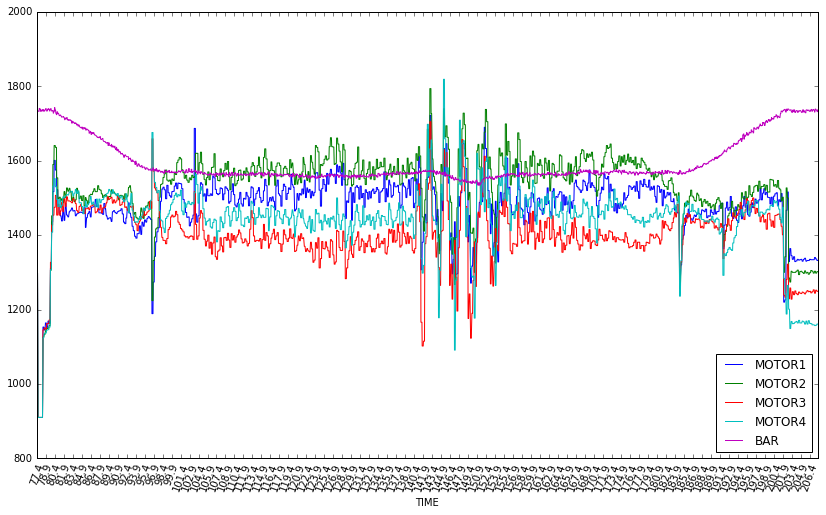

In [47]:
features2use = ['MOTOR1', 'MOTOR2', 'MOTOR3', 'MOTOR4', ('BAR', -100.2e+3, 100.0)]
show_data_from_logid(1,features2use, 1.5)

C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


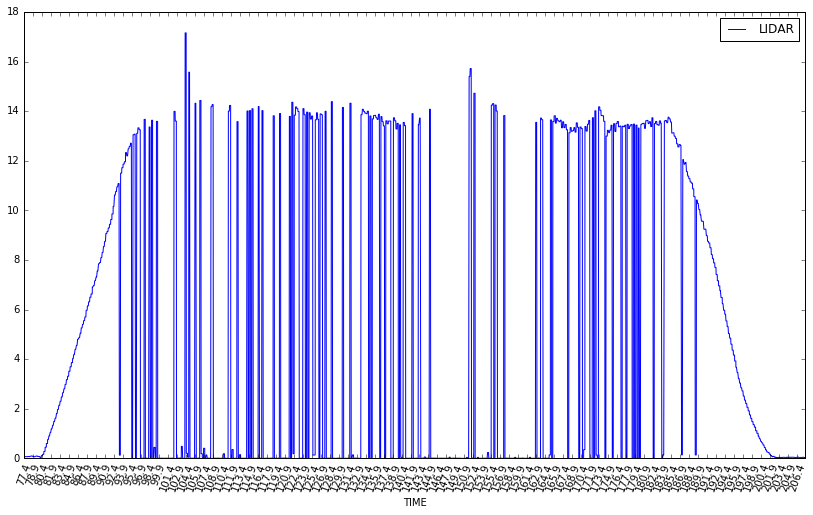

In [40]:
features2use = ['LIDAR']
show_data_from_logid(1,features2use, 1.5)

C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


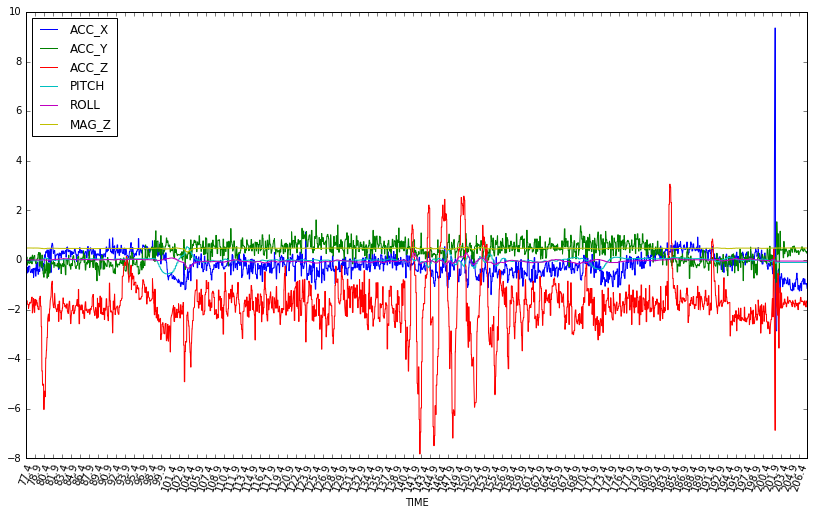

In [20]:
features2use = ['ACC_X','ACC_Y', ('ACC_Z', 8.0), 'PITCH', 'ROLL', 'MAG_Z']
show_data_from_logid(1, features2use, 1.5)

# Data preprocessing

## Relevant features selection

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# create dummies
def preprocess_dumies(X):
    outX = pd.DataFrame(index=X.index) # output dataframe, initially empty
    for col, col_data in X.iteritems():
    # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object and col=='STATUS':
            col_data = pd.get_dummies(col_data, prefix=col) # e.g. 'status' => 'status_flight', 'status_take_off'
        outX = outX.join(col_data) # collect column(s) in output dataframe
    return outX

print all_data.index
all_data = preprocess_dumies(all_data) 
determ_result = None
keys = all_data.keys()
print keys
features2ignore = ['TIME', 'LOG_ID', 'LAND_STATUS', 'index']

def remove_features(all_features, features_to_remove):
    # remove features from the list if they exists
    new_list = []
    for feature in all_features:
        if feature in features_to_remove:
            continue
        else:
            new_list.append(feature)
    return new_list

# make determinant analysis
determ_result = pd.DataFrame(columns=['Feature', 'Score_value'])
regressor = DecisionTreeRegressor(random_state=333)
row_counter = 0
for key in all_data.keys():
    if key not in features2ignore:
        # get y data
        y_data = all_data[key]
        
        # get x data
        x_features = remove_features(all_data.keys(), features2ignore + [key])
        x_data = all_data[x_features]

        X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state = 333)

        regressor.fit(X_train, y_train)
        score = regressor.score(X_test, y_test)
        determ_result.loc[row_counter] = [key, score]
        row_counter += 1
display(determ_result)

/home/sholc/Documents/target_env/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


RangeIndex(start=0, stop=88084, step=1)
Index([u'BAR', u'MOTOR1', u'MOTOR2', u'MOTOR3', u'MOTOR4', u'LIDAR', u'THRUST',
       u'ACC_X', u'ACC_Y', u'ACC_Z', u'MAG_Z', u'GYRO_X', u'GYRO_Y', u'GYRO_Z',
       u'PITCH', u'ROLL', u'YAW', u'TIME', u'LOG_ID', u'LAND_STATUS',
       u'STATUS_flight', u'STATUS_land', u'STATUS_take_off'],
      dtype='object')


,Feature,Score_value
0,BAR,0.980782
1,MOTOR1,0.976751
2,MOTOR2,0.982974
3,MOTOR3,0.979319
4,MOTOR4,0.982618
5,LIDAR,0.758901
6,THRUST,0.948073
7,ACC_X,0.822618
8,ACC_Y,0.831314
9,ACC_Z,0.871194


## Make features' values positive

In [5]:
from sklearn import preprocessing

# gravity constant
g = 9.80665

# features to use
features2use = ['MOTOR1', 'MOTOR2', 'MOTOR3', 'MOTOR4', 'THRUST', \
                'ACC_X','ACC_Y','ACC_Z', 'MAG_Z', 'PITCH', 'ROLL']

# set min values for each feature
min_vals = {'MOTOR1': 900, 'MOTOR2': 900, 'MOTOR3': 900, 'MOTOR4': 900, 
            'THRUST': 1.0, 
            'ACC_X': 8.0 * g, 'ACC_Y': 8.0 * g, 'ACC_Z': 8.0 * g,
            'MAG_Z': 1.3,
            'PITCH': np.pi, 'ROLL': np.pi, 'YAW': np.pi
            }

# set max values for each feature
max_vals = {'MOTOR1': 1890, 'MOTOR2': 1890, 'MOTOR3': 1890, 'MOTOR4': 1890,
            'THRUST': 1.0 + min_vals['THRUST'],
            'ACC_X': 8.0 * g + min_vals['ACC_X'], 'ACC_Y': 8.0 * g + min_vals['ACC_Y'], 'ACC_Z': 8.0 * g + min_vals['ACC_Z'],
            'MAG_Z': 1.3 + min_vals['MAG_Z'],
            'PITCH': np.pi + min_vals['PITCH'], 'ROLL': np.pi + min_vals['ROLL'], 'YAW': np.pi + min_vals['YAW']}

def make_positive(data, features2use):
    # make all data positive
    
    data_positive = data.copy()

    for key in features2use:
        # make negative values as positive
        if key in min_vals.keys():
            data_positive[key] = data_positive[key] + min_vals[key]
        else:
            min_val = data_positive[key].min()
            if min_val <= 0.0:
                data_positive[key] = data_positive[key] + min_val
        
        
    return data_positive.reset_index(drop=True)

'''
        if key in features2use:
            if key not in ['MOTOR1', 'MOTOR2', 'MOTOR3', 'MOTOR4']:
                    data_positive[key] = data_positive[key] + min_vals[key]
            else:
                min_val = data_positive[key].min()
                if min_val <= 0.0:
                    data_positive[key] = data_positive[key] + min_val
'''

def scale(data, features2scale, min_=0.00001, max_=255.0):
    # scale data in a given range
    scaled = data.copy()
    
    for key in scaled.keys():
        if key in features2scale:
            scaled[key] = ((max_ - min_) / (data[key].max() - data[key].min())) * (scaled[key] -  data[key].min()) + min_
        
    return scaled.reset_index(drop=True)

In [6]:
data_positive = make_positive(all_data, features2use)
data_scaled = scale(data_positive, features2use)

In [7]:
print "Features before applying: make positive and scaling:"
display(data_positive[features2use].describe())

print "Features with positive values:"
display(data_positive[features2use].describe())

print "Scaled features:"
display(data_scaled[features2use].describe())

Features before applying: make positive and scaling:


,MOTOR1,MOTOR2,MOTOR3,MOTOR4,THRUST,ACC_X,ACC_Y,ACC_Z,MAG_Z,PITCH,ROLL
count,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000
mean,2366.297852,2410.501919,2341.252009,2376.069797,1.536727,78.388910,78.388942,68.651312,1.781749,3.129401,3.148578
std,97.354726,100.372674,99.776605,99.053814,0.105075,0.658954,0.527975,1.357033,0.020826,0.094939,0.066477
min,1810.000000,1810.000000,1810.000000,1810.000000,1.000000,57.528275,70.807159,30.760005,0.780630,1.717451,1.730067
25%,2334.000000,2380.000000,2306.000000,2345.000000,1.509179,78.074852,78.092560,68.299778,1.772462,3.093987,3.122127
50%,2377.000000,2417.000000,2350.000000,2383.000000,1.546479,78.396069,78.355883,68.678271,1.784339,3.133144,3.151793
75%,2414.000000,2459.000000,2392.000000,2426.000000,1.585419,78.688465,78.644223,69.070576,1.794051,3.169319,3.181318
max,2779.000000,2779.000000,2719.000000,2778.000000,2.000000,95.303137,93.600830,88.268961,1.860690,3.913941,6.261976


Features with positive values:


,MOTOR1,MOTOR2,MOTOR3,MOTOR4,THRUST,ACC_X,ACC_Y,ACC_Z,MAG_Z,PITCH,ROLL
count,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000
mean,2366.297852,2410.501919,2341.252009,2376.069797,1.536727,78.388910,78.388942,68.651312,1.781749,3.129401,3.148578
std,97.354726,100.372674,99.776605,99.053814,0.105075,0.658954,0.527975,1.357033,0.020826,0.094939,0.066477
min,1810.000000,1810.000000,1810.000000,1810.000000,1.000000,57.528275,70.807159,30.760005,0.780630,1.717451,1.730067
25%,2334.000000,2380.000000,2306.000000,2345.000000,1.509179,78.074852,78.092560,68.299778,1.772462,3.093987,3.122127
50%,2377.000000,2417.000000,2350.000000,2383.000000,1.546479,78.396069,78.355883,68.678271,1.784339,3.133144,3.151793
75%,2414.000000,2459.000000,2392.000000,2426.000000,1.585419,78.688465,78.644223,69.070576,1.794051,3.169319,3.181318
max,2779.000000,2779.000000,2719.000000,2778.000000,2.000000,95.303137,93.600830,88.268961,1.860690,3.913941,6.261976


Scaled features:


,MOTOR1,MOTOR2,MOTOR3,MOTOR4,THRUST,ACC_X,ACC_Y,ACC_Z,MAG_Z,PITCH,ROLL
count,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000
mean,146.394176,158.026824,149.031096,149.119630,136.865431,140.820160,84.819813,168.013545,236.362239,163.919349,79.816348
std,25.619664,26.413860,27.990136,26.093721,26.794079,4.448280,5.906627,6.017210,4.916946,11.021920,3.740517
min,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
25%,137.894741,150.000004,139.141919,140.934922,129.840710,138.700101,81.504095,166.454812,234.169633,159.808026,78.327999
50%,149.210530,159.736846,151.485153,150.945252,139.352131,140.868481,84.449974,168.133084,236.973706,164.353955,79.997245
75%,158.947372,170.789477,163.267330,162.272731,149.281895,142.842307,87.675726,169.872602,239.266854,168.553596,81.658533
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


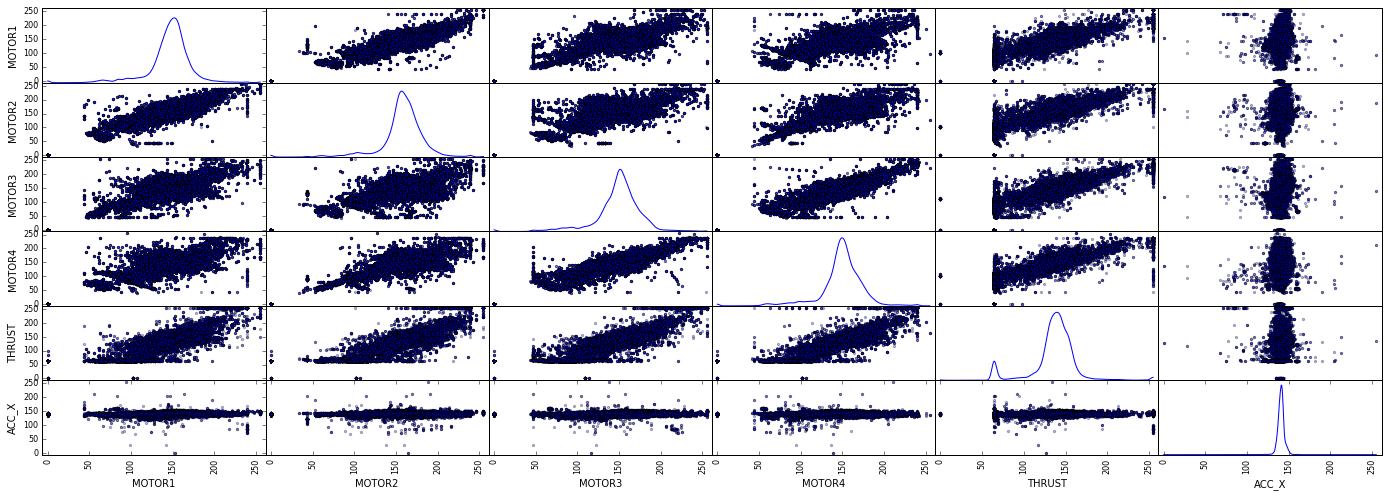

In [49]:
pd.scatter_matrix(data_scaled[features2use[0:6]], alpha = 0.3, figsize = (24,8), diagonal = 'kde');

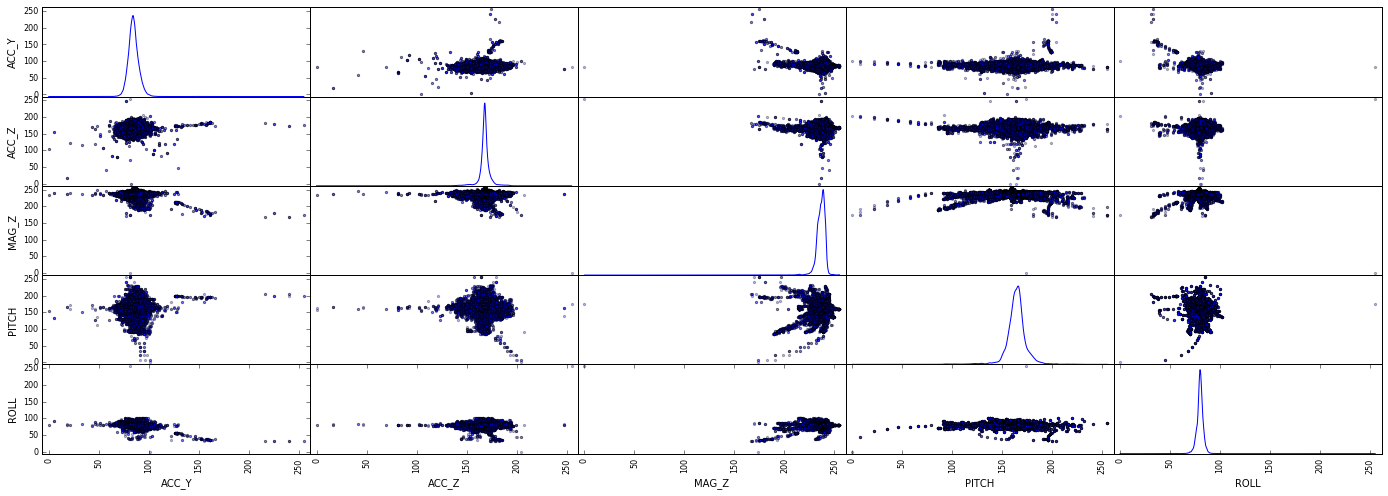

In [50]:
pd.scatter_matrix(data_scaled[features2use[6:12]], alpha = 0.3, figsize = (24,8), diagonal = 'kde');

In [12]:
print data_scaled.keys()

Index([u'BAR', u'MOTOR1', u'MOTOR2', u'MOTOR3', u'MOTOR4', u'LIDAR', u'THRUST',
       u'ACC_X', u'ACC_Y', u'ACC_Z', u'MAG_Z', u'GYRO_X', u'GYRO_Y', u'GYRO_Z',
       u'PITCH', u'ROLL', u'YAW', u'TIME', u'LOG_ID', u'LAND_STATUS',
       u'STATUS_flight', u'STATUS_land', u'STATUS_take_off'],
      dtype='object')


## Outlier detection

In [8]:
def update_dictionary(ind_dic, indices):
    # count indices found in outliers for features
    for value in indices:
        if ind_dic.has_key(value):
            ind_dic[value] = ind_dic[value] + 1
        else:
            ind_dic[value] = 1

def display_indices(ind_dic):
    # display how many times sample is detected in the outliers
    
    items = ind_dic.items()
    items.sort(key=lambda tup: tup[1], reverse=True)
    for item in items:
        if item[1] > 1:
            print "{:3d}: repeats in {:d} times".format(item[0], item[1])

indices_dic = {} # dictionary for indices in outliers
all_outliers = [] # list of outliers to revoke

for feature in features2use:
    
    # TODO: Calculate Q1 (10th percentile of the data) for the given feature
    Q1 = np.percentile(data_scaled[feature], 10.0)
    
    # TODO: Calculate Q3 (90th percentile of the data) for the given feature
    Q3 = np.percentile(data_scaled[feature], 90.0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    
    step = 1.7 * (Q3 - Q1)
    
    print "\nData points considered outliers for the feature '{}':".format(feature)
    print "Q1-step={:.3f}, Q3+step={:.3f}, step={:.3f}".format(Q1-step, Q3+step, step)
    
    # Display the outliers
    cols = [feature, 'LAND_STATUS', 'STATUS_flight', 'STATUS_land', 'STATUS_take_off']
    outliers = data_scaled[~((data_scaled[feature] >= Q1 - step) & 
                             (data_scaled[feature] <= Q3 + step)) & 
                           ~((data_scaled['STATUS_land'] == 1.0) & (data_scaled['LAND_STATUS'] == 1.0))]
    #all_outliers = all_outliers + list(outliers.index)
    update_dictionary(indices_dic, list(outliers.index))
    #display(outliers[cols])


Data points considered outliers for the feature 'MOTOR1':
Q1-step=40.868, Q3+step=250.447, step=80.974

Data points considered outliers for the feature 'MOTOR2':
Q1-step=53.579, Q3+step=264.316, step=81.421

Data points considered outliers for the feature 'MOTOR3':
Q1-step=23.536, Q3+step=274.104, step=96.810

Data points considered outliers for the feature 'MOTOR4':
Q1-step=40.489, Q3+step=259.557, step=84.640

Data points considered outliers for the feature 'THRUST':
Q1-step=34.542, Q3+step=235.443, step=77.621

Data points considered outliers for the feature 'ACC_X':
Q1-step=121.922, Q3+step=159.806, step=14.637

Data points considered outliers for the feature 'ACC_Y':
Q1-step=57.132, Q3+step=112.827, step=21.518

Data points considered outliers for the feature 'ACC_Z':
Q1-step=149.033, Q3+step=187.753, step=14.960

Data points considered outliers for the feature 'MAG_Z':
Q1-step=216.315, Q3+step=256.465, step=15.512

Data points considered outliers for the feature 'PITCH':
Q1-step

ALL Motors - OK
Thrust outliers - OK
ACC_X: 75.0 - 190.0
ACC_Y: 40.0 - 175.0
ACC_Z: 75.0 - 220.0
MAG_Z: 150.0 -
Pitch: 80.0 - 245.0
Roll: 25.0 - 125.0

In [79]:
outliers_dict = {'MOTOR1': (40.868, 250.447),
                 'MOTOR2': (53.579, 264.316),
                 'MOTOR3': (23.536, 274.104),
                 'MOTOR4': (40.489, 259.557),
                 'THRUST': (34.542, 235.443),
                 'ACC_X': (75.0, 190.0),
                 'ACC_Y': (40.0, 175.0),
                 'ACC_Z': (75.0, 220.0),
                 'MAG_Z': (150.0, None),
                 'PITCH': (80.0, 245.0),
                 'ROLL': (25.0, 125.0)}

def cut_outliers(input_dataset, params):
    # cuts the outliers of particular feature in a given range
    
    # get range for each feature
    dataset = input_dataset.copy()
    indexes = []
    for key in params.keys():
        range_from = params[key][0]
        range_to = params[key][1]
        
        if range_from is None:
            range_from = -np.inf
            print "range_from", range_from
        if range_to is None:
            print "range_to", range_to
            range_to = np.inf
        
        sub_dataset = dataset[~((dataset[key] >= range_from) & (dataset[key] <= range_to))]
        dataset= dataset.drop(sub_dataset.index)
#        indexes += list(sub_dataset.index)
#        print len(indexes)
        
#    indexes = list(np.unique(np.array(indexes, dtype = np.int64)))
   
#    sub_set = dataset.ix[indexes]
    return dataset

In [80]:
print data_scaled.shape
filtered_outliers = cut_outliers(data_scaled, outliers_dict)

(88084, 23)
range_to None


In [81]:
display(filtered_outliers.describe())

,BAR,MOTOR1,MOTOR2,MOTOR3,MOTOR4,LIDAR,THRUST,ACC_X,ACC_Y,ACC_Z,...,GYRO_Z,PITCH,ROLL,YAW,TIME,LOG_ID,LAND_STATUS,STATUS_flight,STATUS_land,STATUS_take_off
count,86575.000000,86575.000000,86575.000000,86575.000000,86575.000000,86575.000000,86575.000000,86575.000000,86575.000000,86575.000000,...,86575.000000,86575.000000,86575.000000,86575.000000,8.657500e+04,86575.000000,86575.000000,86575.000000,86575.000000,86575.000000
mean,1014.528161,146.472485,158.382340,149.090427,149.392034,5.962414,136.354502,140.878211,84.853294,168.234194,...,-0.005463,164.005948,79.822421,-0.198400,2.262052e+08,13.383679,0.012925,0.566861,0.303875,0.129264
std,2.758743,22.528257,22.720545,25.111304,22.946512,8.383467,23.491966,3.888920,5.594636,5.264307,...,0.204944,10.577573,3.624692,2.122542,2.597899e+08,6.676389,0.112953,0.495512,0.459932,0.335493
min,1009.239990,43.421061,53.684218,43.481856,43.465917,0.000000,63.750038,75.113021,42.753374,81.316028,...,-2.315323,85.817994,30.673839,-3.141173,3.738236e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1012.159973,138.157899,150.263162,139.422447,141.198352,0.058000,129.990103,138.723893,81.544778,166.507068,...,-0.033689,159.829754,78.330846,-2.521631,7.809806e+07,8.000000,0.000000,0.000000,0.000000,0.000000
50%,1013.969971,149.210530,159.736846,151.485153,150.945252,5.001000,139.301320,140.881648,84.472506,168.153191,...,0.000449,164.366613,80.000907,-0.106443,1.295303e+08,14.000000,0.000000,1.000000,0.000000,0.000000
75%,1017.429993,158.684214,170.526319,162.986802,162.009301,7.992501,149.006151,142.845024,87.700345,169.897090,...,0.033867,168.559871,81.663282,1.648545,2.583633e+08,18.000000,0.000000,1.000000,1.000000,0.000000
max,1019.669983,247.631579,255.000000,255.000000,255.000000,65.324005,234.873986,175.567120,166.557003,207.164207,...,1.986229,240.668964,101.765360,3.141524,1.633813e+09,24.000000,1.000000,1.000000,1.000000,1.000000


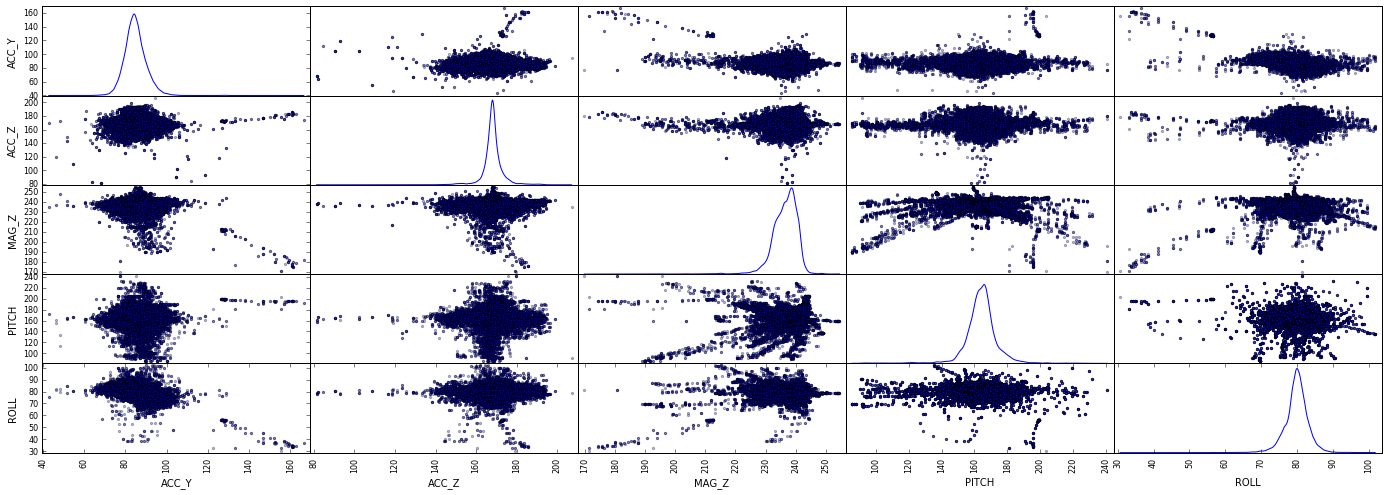

In [82]:
pd.scatter_matrix(filtered_outliers[features2use[6:12]], alpha = 0.3, figsize = (24,8), diagonal = 'kde');

## Data scaling
Apply logarithm function for all features

In [11]:
log_data = np.log(data_scaled)

In [12]:
display(log_data.describe())

,MOTOR1,MOTOR2,MOTOR3,MOTOR4,THRUST,ACC_X,ACC_Y,ACC_Z,MAG_Z,PITCH,ROLL
count,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000
mean,4.901363,4.978668,4.915997,4.919589,4.883893,4.946439,4.437914,5.122973,5.464961,5.096549,4.378350
std,1.117256,1.121463,1.121611,1.118665,0.522794,0.101601,0.101843,0.088755,0.061096,0.095737,0.073922
min,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925
25%,4.926491,5.010635,4.935494,4.948298,4.866308,4.932314,4.400653,5.114724,5.456046,5.073973,4.360905
50%,5.005358,5.073528,5.020488,5.016917,4.937004,4.947827,4.436159,5.124756,5.467949,5.102022,4.381992
75%,5.068573,5.140432,5.095389,5.089278,5.005836,4.961741,4.473645,5.135049,5.477579,5.127254,4.402546
max,5.541264,5.541264,5.541264,5.541264,5.541264,5.541264,5.541264,5.541264,5.541264,5.541264,5.541264


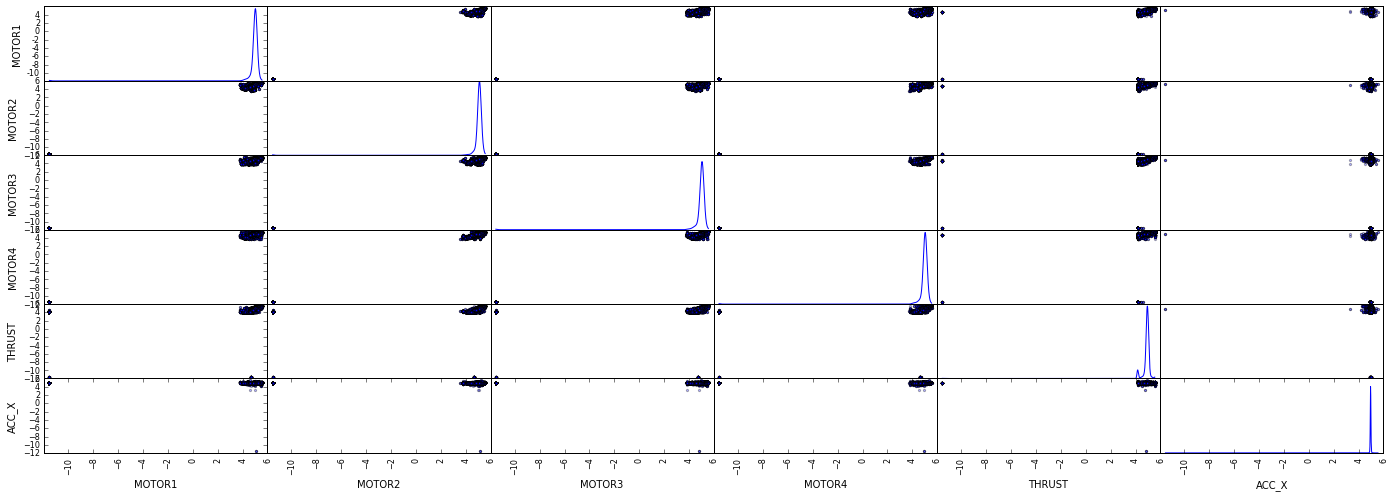

In [13]:
pd.scatter_matrix(log_data[log_data.keys()[0:6]], alpha = 0.3, figsize = (24,8), diagonal = 'kde');

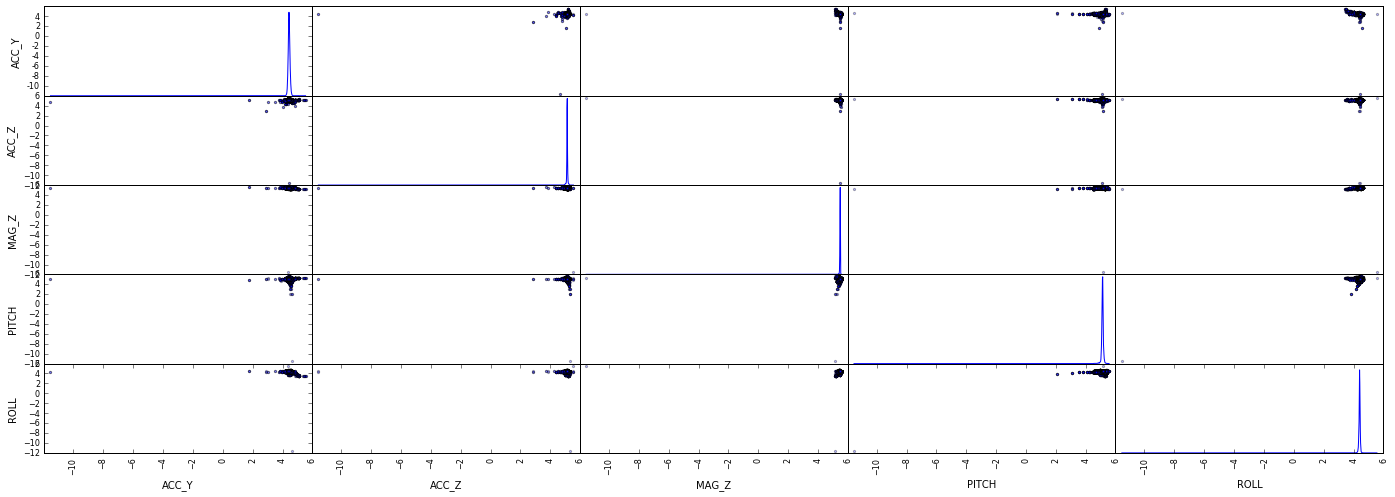

In [14]:
pd.scatter_matrix(log_data[log_data.keys()[6:12]], alpha = 0.3, figsize = (24,8), diagonal = 'kde');